<a href="https://colab.research.google.com/github/Nsarkar-XLR8/ML_Code/blob/main/OvA_OvR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

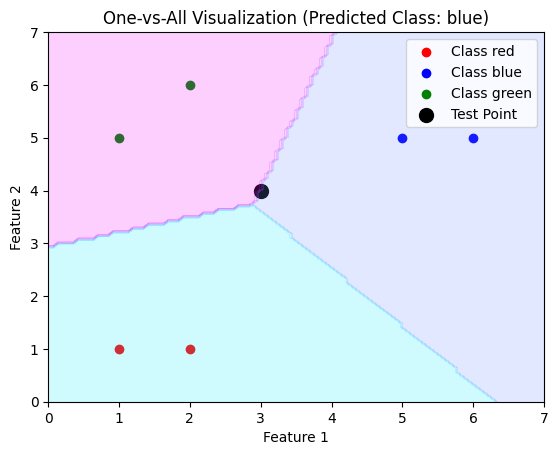

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

# Data points for Red, Blue, and Green
X = np.array([
    [1, 1], [2, 1],  # Red
    [5, 5], [6, 5],  # Blue
    [1, 5], [2, 6]   # Green
])
y = np.array([0, 0, 1, 1, 2, 2])  # 0: Red, 1: Blue, 2: Green

# Train a One-vs-All Classifier
model = OneVsRestClassifier(LogisticRegression())
model.fit(X, y)

# Predict for a new point
new_point = np.array([[3, 4]])  # Test point
predicted_class = model.predict(new_point)

# Plot the data
colors = ['red', 'blue', 'green']
for idx, color in enumerate(colors):
    plt.scatter(X[y == idx][:, 0], X[y == idx][:, 1], label=f"Class {color}", color=color)

# Highlight the test point
plt.scatter(new_point[0, 0], new_point[0, 1], color='black', label='Test Point', s=100)

# Add decision boundaries (visualize classifiers)
x_min, x_max = 0, 7
y_min, y_max = 0, 7
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.2, cmap='cool')

plt.legend()
plt.title(f"One-vs-All Visualization (Predicted Class: {colors[predicted_class[0]]})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
